In [ ]:
from pandasql import sqldf
import tkinter as tk
from tkinter import filedialog
from tkinter.filedialog import askopenfilename
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Función para leer el archivo que suba el usuario, peritiendo tener 
# versiones actualizadas de los datos

def select_file():
        file_path = filedialog.askopenfilename(
            title="Select a file",
            filetypes=[("CSV files", "*.csv")]
        )
        if file_path: 
            print("Selected file:", file_path)
            data = pd.read_csv(file_path, header = 0)
            
root = tk.Tk()
root.title("File Upload Example")

upload_button = tk.Button(root, text="Select File", command=select_file)
upload_button.pack(pady=20)

root.mainloop()



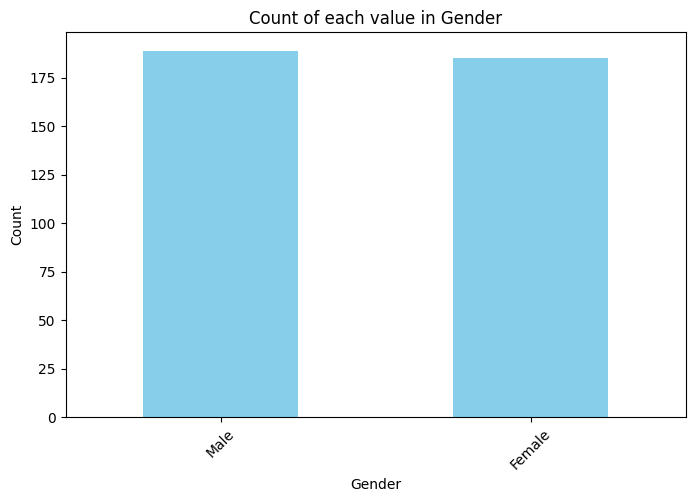

In [ ]:
# Función para encontrar el número de personas de cada género en el estudio, 
# para asegurar que este balanceado y no este inclinado con un bias hacia un cierto resultado
def plot_column_counts(data: DataFrame, column: str):
    counts = data[column].value_counts()
    plt.figure(figsize=(8, 5))
    counts.plot(kind='bar', color='skyblue')
    plt.title(f'Count of each value in {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

plot_column_counts(data, "Gender")


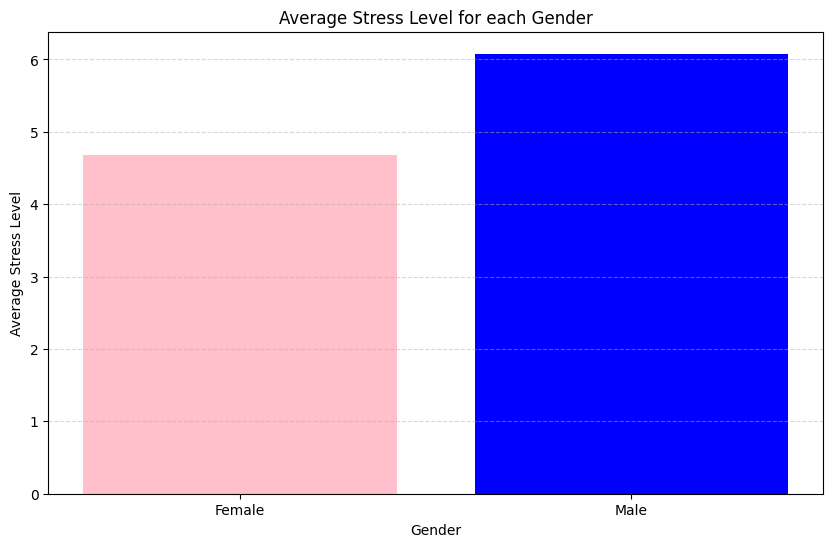

In [ ]:
# Ya que el conteo de hombres y mujeres es prácticamente igual, se halla un promedio 
# del nivel de estrés de cada género para determinar cual de los dos experimenta niveles
# de estrés más altos.
def bar_avg_by_group(data: DataFrame, x_col: str, y_col: str):
    avg = data.groupby(x_col)[y_col].mean().reset_index()
    plt.figure(figsize=(10, 6))
    plt.bar(avg[x_col], avg[y_col], color=['pink', 'blue'])
    plt.xlabel(x_col)
    plt.ylabel(f'Average {y_col}')
    plt.title(f'Average {y_col} for each {x_col}')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()

# Example usage:
bar_avg_by_group(data, 'Gender', 'Stress Level')